
# Block Friday Sales Data EDA and Analysis

In [31]:
import os 
os.chdir(r"C:\Users\admin\Desktop\Data Analytics\Black Friday Sale")

# Importing Library and Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [33]:
df=pd.read_csv(r"C:\Users\admin\Desktop\Data Analytics\Black Friday Sale\train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Investigation 

In [34]:
print("Data investigation details.\n")
print("Number of columns and rows:", df.shape, "\n")
print("Column names:", df.columns, "\n")
print("Basic Infomation of the data:", df.info(), "\n")
print("Null values in the column", df.isnull().sum(), "\n")

Data investigation details.

Number of columns and rows: (550068, 12) 

Column names: Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550

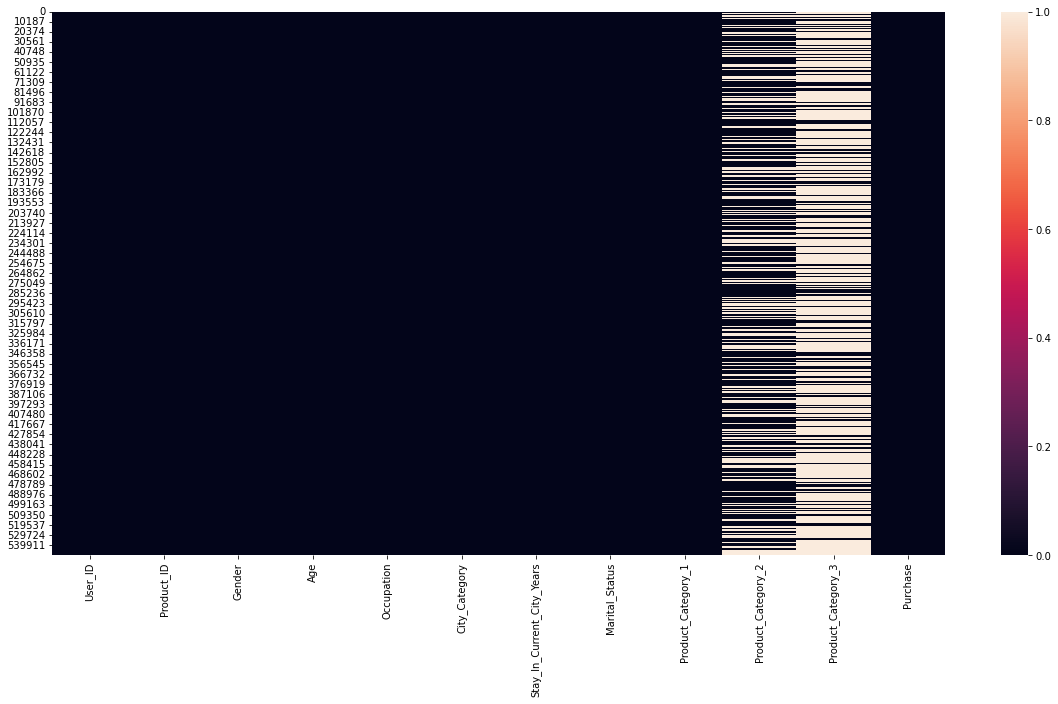

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull())
plt.show()

# Data scrubbing

In [36]:
df.drop(["User_ID", "Product_ID"], axis=1, inplace=True)

In [37]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [38]:
df.dropna(axis=0, inplace=True)

In [39]:
df.shape

(166821, 10)

In [40]:
df.duplicated().sum()

211

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.shape

(166610, 10)

In [43]:
def ages(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)
df['Age']=df['Age'].apply(ages)

In [44]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,child,10,A,2,0,1,6.0,14.0,15200
6,M,adult,7,B,2,1,1,8.0,17.0,19215
13,M,adult,20,A,1,1,1,2.0,5.0,15665
14,F,old,9,A,1,0,5,8.0,14.0,5378
16,F,old,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,adult,0,B,4+,1,3,4.0,12.0,8047
545904,M,adult,6,B,2,0,6,8.0,14.0,16493
545907,M,adult,6,B,2,0,2,3.0,10.0,3425
545908,M,adult,6,B,2,0,1,2.0,15.0,15694


In [45]:
df["Occupation"].unique()

array([10,  7, 20,  9,  1, 12, 17,  0,  3, 15,  4, 11,  8, 16, 19,  2, 14,
       13,  6,  5, 18], dtype=int64)

In [46]:
df["City_Category"].unique()

array(['A', 'B', 'C'], dtype=object)

In [47]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '1', '4+', '0', '3'], dtype=object)

In [48]:
def cities(value):
    if '+' in value:
        value=value.replace('+','')
        return int(value)
    else:
        return int(value)

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].apply(cities)

In [49]:
df["Age"].unique()

array(['child', 'adult', 'old', 'teenage'], dtype=object)

In [50]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [51]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166610 entries, 1 to 545914
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      166610 non-null  object 
 1   Age                         166610 non-null  object 
 2   Occupation                  166610 non-null  int64  
 3   City_Category               166610 non-null  object 
 4   Stay_In_Current_City_Years  166610 non-null  int64  
 5   Marital_Status              166610 non-null  int64  
 6   Product_Category_1          166610 non-null  int64  
 7   Product_Category_2          166610 non-null  float64
 8   Product_Category_3          166610 non-null  float64
 9   Purchase                    166610 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 14.0+ MB


# Univariate analysis

In [206]:
df["Gender"].value_counts()

M    129047
F     37563
Name: Gender, dtype: int64

Text(0, 0.5, 'Count...')

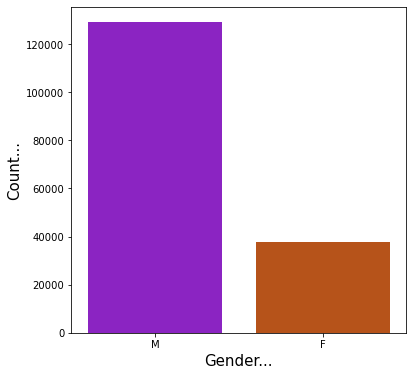

In [213]:
plt.figure(figsize=(6,6))
sns.countplot(x="Gender", data=df, order=["M", "F"], palette="gnuplot")
plt.xlabel("Gender...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})
plt.ylabel("Count...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})


Observations:
    
    1.The Maximum orders recived from the male, compared to male female orders are less
    

In [108]:
df["Age"].value_counts()

adult      113461
teenage     31265
old         17017
child        4867
Name: Age, dtype: int64

Text(0, 0.5, 'Count...')

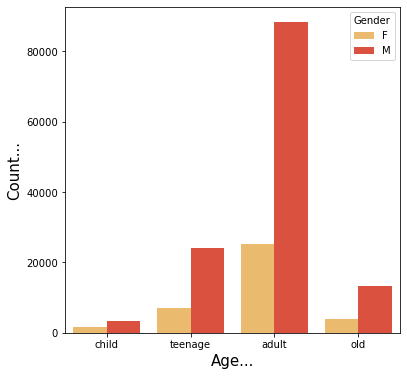

In [214]:
plt.figure(figsize=(6,6))
sns.countplot(x="Age", data=df, palette="YlOrRd", order=["child", "teenage", "adult", "old"], hue="Gender")
plt.xlabel("Age...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})
plt.ylabel("Count...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})

observations:
    
    1. According the age column the maximum orders recived from the age group of 26 to 35, in that number of order from male is more compare to female.

In [210]:
df["City_Category"].value_counts().sort_values(ascending=True)

A    41480
C    55990
B    69140
Name: City_Category, dtype: int64

Text(0, 0.5, 'Count...')

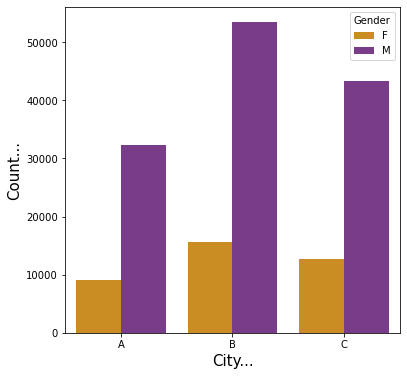

In [215]:
plt.figure(figsize=(6,6))
sns.countplot(x="City_Category", data=df, palette="CMRmap_r", order=["A", "B", "C"], hue="Gender")
plt.xlabel("City...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})
plt.ylabel("Count...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})

Observations:
    
    1. from city B, We are reciving maximum number of orders, and 2nd maximum order recived from city c and the least order is recived from city A.
    2. Compared to the female orders, we are reciving more orders from the male.

In [211]:
df["Stay_In_Current_City_Years"].value_counts()

1    58195
2    31478
3    29239
4    25333
0    22365
Name: Stay_In_Current_City_Years, dtype: int64

Text(0, 0.5, 'Count...')

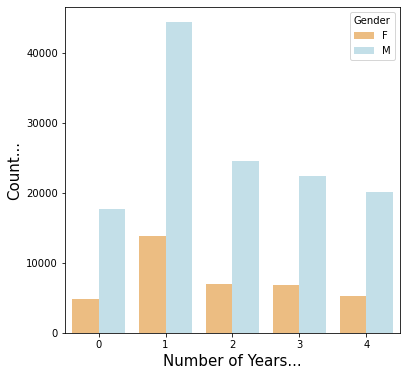

In [216]:
plt.figure(figsize=(6,6))
sns.countplot(x="Stay_In_Current_City_Years", data=df, palette="RdYlBu", hue="Gender")
plt.xlabel("Number of Years...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})
plt.ylabel("Count...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})

Observations:
    
    1. We are getting maximum orders from the peaple, who are staying for one year in the city. least order recived from the peaple are from less then one year, we are reciving avg order from the rest of the group.

In [153]:
df["Marital_Status"].value_counts(ascending=True)

1    67130
0    99480
Name: Marital_Status, dtype: int64

Text(0, 0.5, 'Count...')

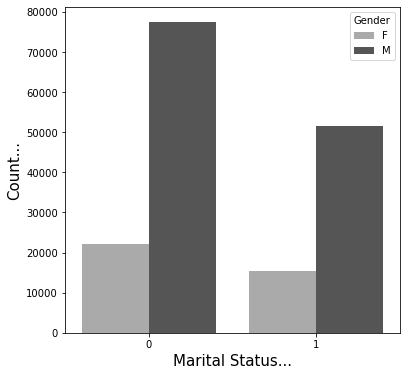

In [217]:
plt.figure(figsize=(6,6))
sns.countplot(x="Marital_Status", data=df, palette="gist_gray_r", hue="Gender")
plt.xlabel("Marital Status...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})
plt.ylabel("Count...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})

Observations:
    
    1. we are reciving maximum orders from the married peaple compared to not married peaple.

In [154]:
df["Occupation"].value_counts()

4     22315
0     20942
7     17773
17    14050
1     13499
12    10462
20     9213
14     8381
2      7539
16     7327
6      5813
3      5011
10     4325
15     3982
5      3869
11     3267
19     2408
13     2045
18     1982
9      1865
8       542
Name: Occupation, dtype: int64

Text(0, 0.5, 'Count...')

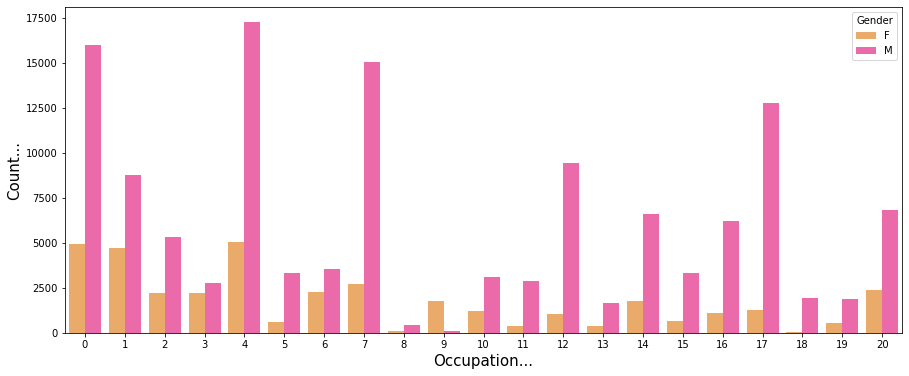

In [218]:
plt.figure(figsize=(15,6))
sns.countplot(x="Occupation", data=df, palette="spring_r", hue="Gender")
plt.xlabel("Occupation...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})
plt.ylabel("Count...", fontdict={"fontsize":15, "fontweight":20, "color":"black"})

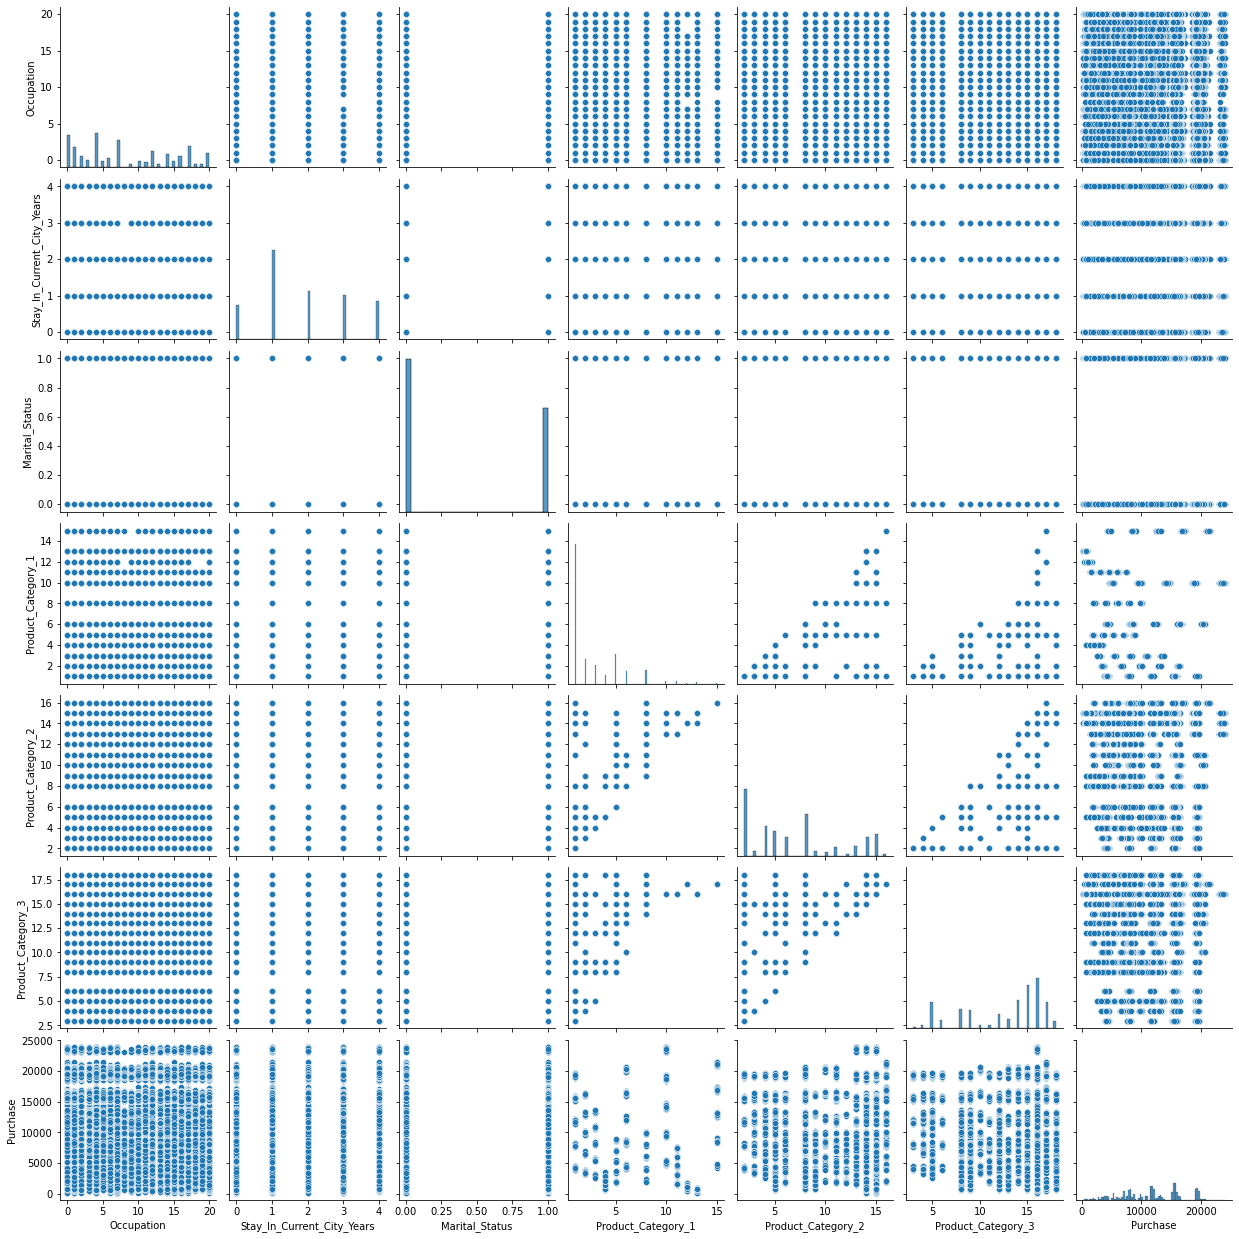

In [219]:
sns.pairplot(df)

# Bivariate analysis

In [174]:
df.groupby("Age").sum()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,
adult,948197,213244,49040,311906,787664.0,1442273.0,1322029440
child,42496,8552,0,12947,30667.0,57666.0,54380002
old,157690,30771,11656,51475,124352.0,223283.0,203797296
teenage,214392,57633,6434,80707,206534.0,387449.0,362068263


<AxesSubplot:xlabel='Age', ylabel='Product_Category_3'>

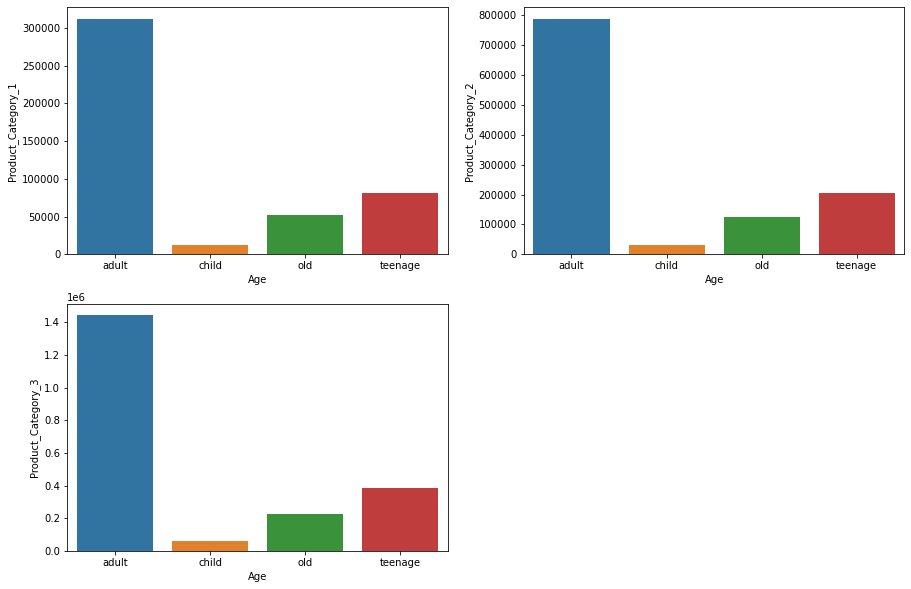

In [205]:
group_Age=df.groupby("Age").sum()
group_Age.head()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x=group_Age.index, y="Product_Category_1", data=group_Age)


plt.subplot(2,2,2)
sns.barplot(x=group_Age.index, y="Product_Category_2", data=group_Age)

plt.subplot(2,2,3)
sns.barplot(x=group_Age.index, y="Product_Category_3", data=group_Age)



In [188]:
df.groupby("City_Category").sum()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
City_Category,,,,,,,
A,325790,75384,15340,117355,288166.0,525955.0,464598874
B,558204,129741,28140,190480,476598.0,876196.0,794278709
C,478781,105075,23650,149200,384453.0,708520.0,683397418


<AxesSubplot:xlabel='City_Category', ylabel='Product_Category_3'>

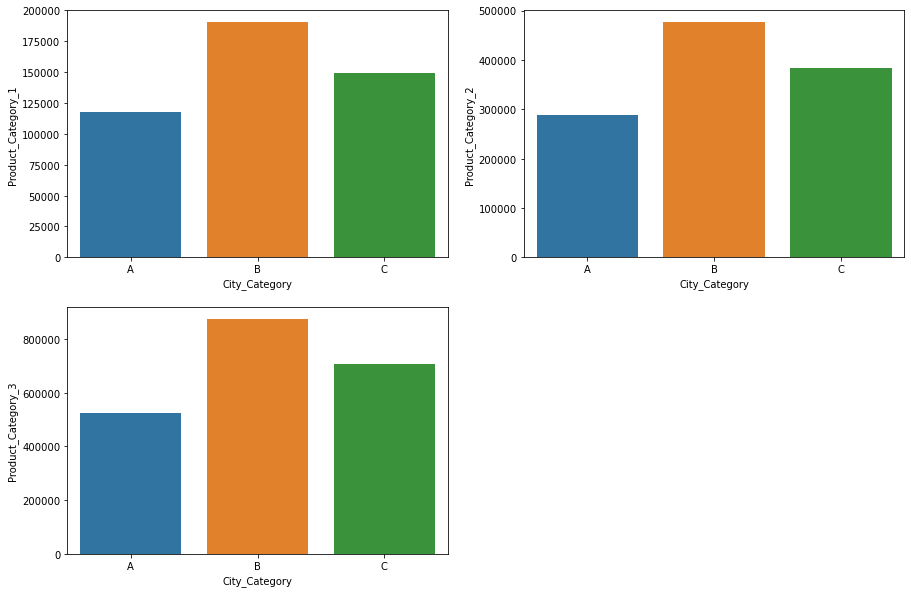

In [186]:
group_City_Category=df.groupby("City_Category").sum()
group_City_Category.head()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x=group_City_Category.index, y="Product_Category_1", data=group_City_Category)


plt.subplot(2,2,2)
sns.barplot(x=group_City_Category.index, y="Product_Category_2", data=group_City_Category)

plt.subplot(2,2,3)
sns.barplot(x=group_City_Category.index, y="Product_Category_3", data=group_City_Category)

In [189]:
df.groupby("Gender").sum()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,
F,256666,69033,15507,116705,264147.0,467847.0,416377135
M,1106109,241167,51623,340330,885070.0,1642824.0,1525897866


<AxesSubplot:xlabel='Gender', ylabel='Product_Category_3'>

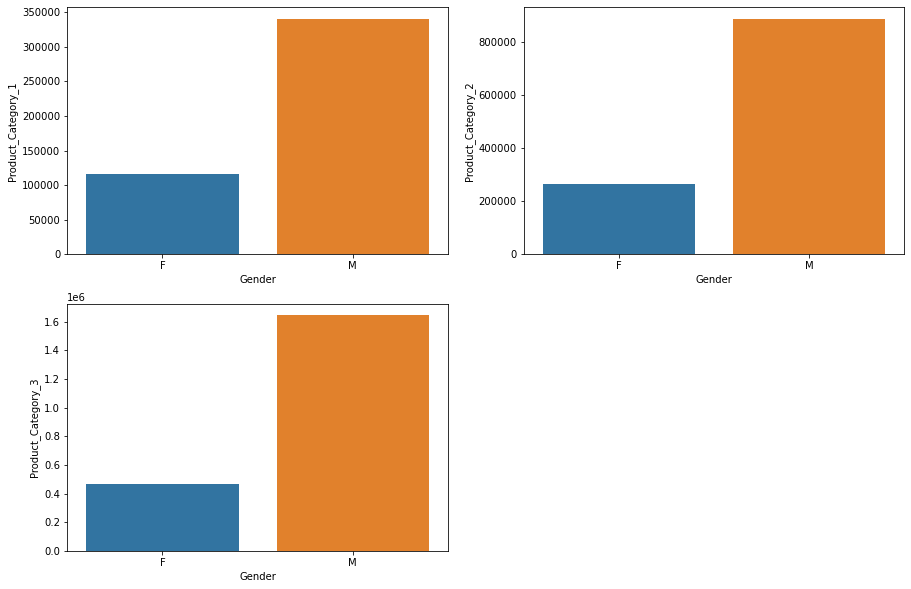

In [187]:
group_Gender=df.groupby("Gender").sum()
group_Gender.head()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x=group_Gender.index, y="Product_Category_1", data=group_Gender)


plt.subplot(2,2,2)
sns.barplot(x=group_Gender.index, y="Product_Category_2", data=group_Gender)

plt.subplot(2,2,3)
sns.barplot(x=group_Gender.index, y="Product_Category_3", data=group_Gender)

In [194]:
df.groupby("Marital_Status").sum()

,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Marital_Status,,,,,,
0,799286,186693,269622,680785.0,1253730.0,1157740085
1,563489,123507,187413,468432.0,856941.0,784534916


<AxesSubplot:xlabel='Marital_Status', ylabel='Product_Category_3'>

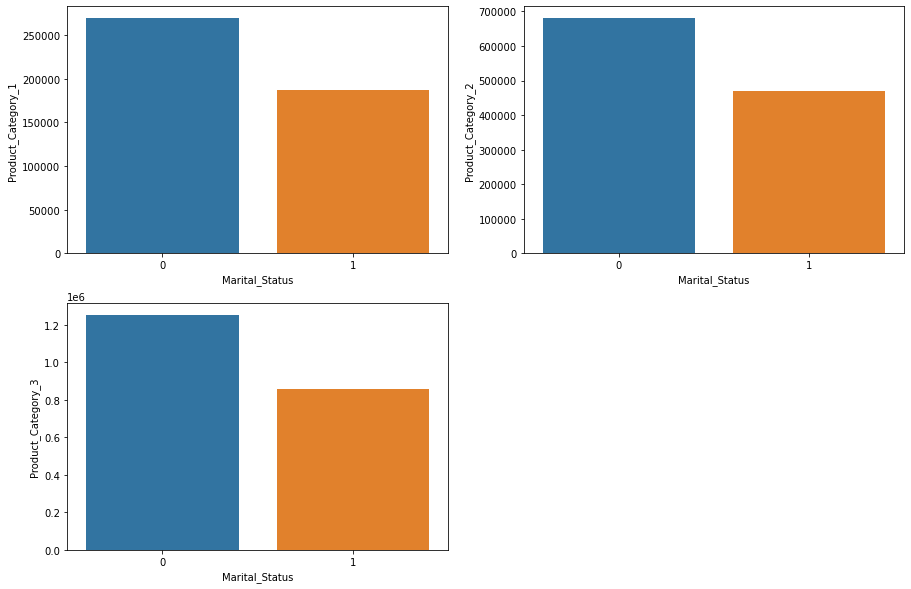

In [191]:
group_Marital_Status=df.groupby("Marital_Status").sum()
group_Marital_Status.head()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x=group_Marital_Status.index, y="Product_Category_1", data=group_Marital_Status)


plt.subplot(2,2,2)
sns.barplot(x=group_Marital_Status.index, y="Product_Category_2", data=group_Marital_Status)

plt.subplot(2,2,3)
sns.barplot(x=group_Marital_Status.index, y="Product_Category_3", data=group_Marital_Status)

In [193]:
df.groupby("Stay_In_Current_City_Years").sum()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Stay_In_Current_City_Years,,,,,,
0,174115,8743,61722,154826.0,283251.0,257250370
1,473800,24629,160755,402499.0,737917.0,678090849
2,254461,12369,85352,215199.0,397149.0,370530317
3,249942,11416,78995,200394.0,370121.0,340088375
4,210457,9973,70211,176299.0,322233.0,296315090


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Product_Category_3'>

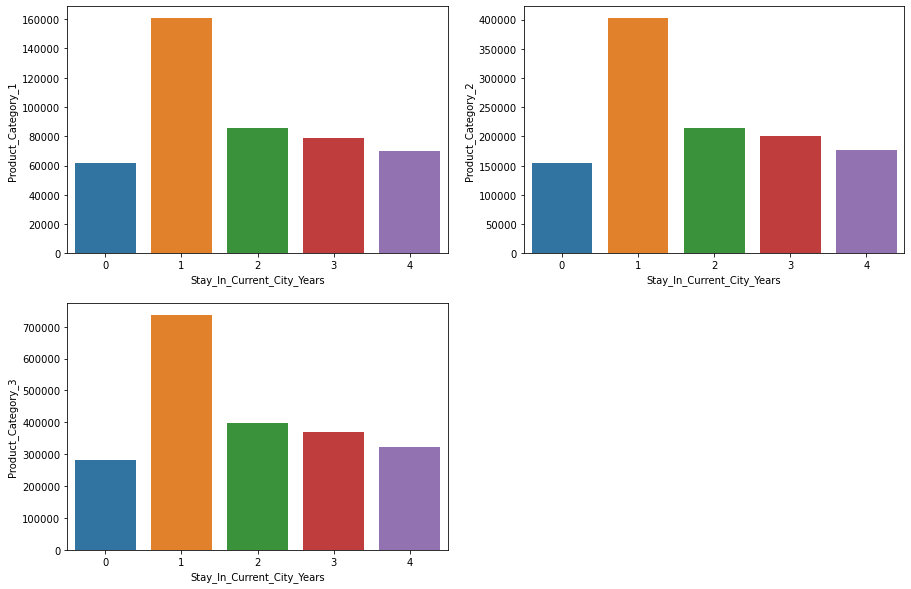

In [192]:
group_Stay_In_Current_City_Years=df.groupby("Stay_In_Current_City_Years").sum()
group_Marital_Status.head()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x=group_Stay_In_Current_City_Years.index, y="Product_Category_1", data=group_Stay_In_Current_City_Years)


plt.subplot(2,2,2)
sns.barplot(x=group_Stay_In_Current_City_Years.index, y="Product_Category_2", data=group_Stay_In_Current_City_Years)

plt.subplot(2,2,3)
sns.barplot(x=group_Stay_In_Current_City_Years.index, y="Product_Category_3", data=group_Stay_In_Current_City_Years)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

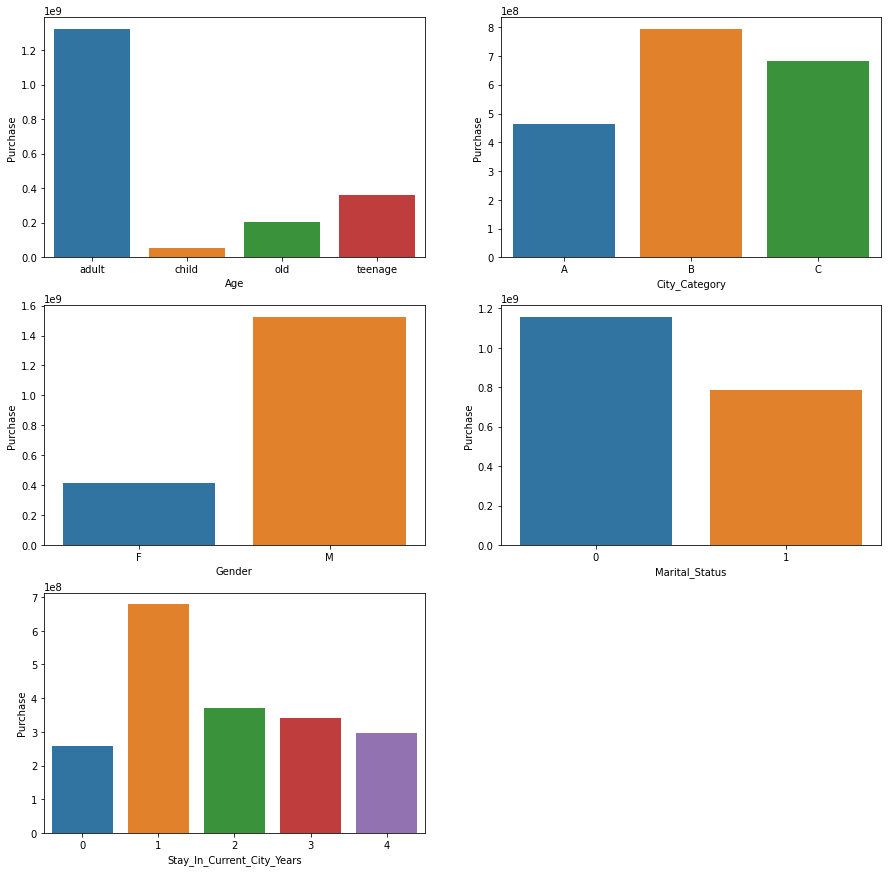

In [200]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x=group_Age.index, y="Purchase", data=group_Age)


plt.subplot(3,2,2)
sns.barplot(x=group_City_Category.index, y="Purchase", data=group_City_Category)

plt.subplot(3,2,3)
sns.barplot(x=group_Gender.index, y="Purchase", data=group_Gender)

plt.subplot(3,2,4)
sns.barplot(x=group_Marital_Status.index, y="Purchase", data=group_Marital_Status)

plt.subplot(3,2,5)
sns.barplot(x=group_Stay_In_Current_City_Years.index, y="Purchase", data=group_Stay_In_Current_City_Years)

# The End